# 2019-07-08 spyros without fetal cells

In [1]:
import pandas as pd
import numpy as np
import loompy
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import matplotlib as mpl
import imp
import sys
sys.path.append('/home/bojk/Data/minimeta_pyfiles/')
import leidenalgorithm_implementation as li
import semiannotate 

In [242]:
# load data
# darmanis brain atlas
BA_count_path = '../leidenalg/Datasets/Darmanis_Brain/All_cell_counts_brain.csv'
BA_counttable = pd.read_csv(BA_count_path,index_col=0)
BA_meta = pd.read_csv('../leidenalg/Datasets/Darmanis_Brain/All_cell_info_brain.csv',sep=';',index_col=0)

#darmanis glioblastoma dataset (to annotate based on brain atlas)
GBM_count_path = '../leidenalg/Datasets/Darmanis_Glioblastoma/GBM_data_and_metadata/GBM_raw_gene_counts.csv'
GBM_counttable = pd.read_csv(GBM_count_path,sep=' ',index_col=0)
GBM_meta = pd.read_csv('../leidenalg/Datasets/Darmanis_Glioblastoma/GBM_data_and_metadata/GBM_metadata.csv',sep=' ',index_col=0)
GBMtsne = pd.read_csv('../leidenalg/Datasets/Darmanis_Glioblastoma/GBM_data_and_metadata/GBM_TSNE.csv',sep=' ',index_col=0)
GBM_meta = GBM_meta.join(GBMtsne)
# add annotation from separate file
GBMmeta2= pd.read_csv('../leidenalg/Datasets/Darmanis_Glioblastoma/GBM_data_and_metadata/GEO_upload/spyros.darmanis_metadata_GBM.csv',index_col=0)
GBM_meta = GBM_meta.join(GBMmeta2['characteristics: cell type'])
GBM_meta.rename(index=str,columns={'characteristics: cell type':'Cell_type2'},inplace=True)

lut = {'Astocyte':'Astrocytes','Neuron':'Neurons','Oligodendrocyte':'Oligodendrocytes','Vascular':'Endothelial'
       ,'Immune cell':'Immune cell', 'Neoplastic':'Neoplastic','OPC':'OPC'}

GBM_meta['Cell_type'] = GBM_meta['Cell_type2'].map(lut)

In [243]:
idx_fetal = list(BA_meta[~BA_meta.Cell_type.str.contains('Fetal')].index)
BA_newmet = BA_meta[BA_meta.index.isin(idx_fetal)].copy()# no fetal cells 
idx_hyb = list(BA_newmet[~BA_newmet.Cell_type.str.contains('ybrid')].index)
BA_newmeta = BA_newmet[BA_newmet.index.isin(idx_hyb)].copy()# no hybrid cells 
BA_newcounts = BA_counttable[BA_newmeta.index].copy()

In [670]:
import get_timestamp as time

imp.reload(li)
keys = ['cell type column','number of features cell type','number of features new data']
values = ['Cell_type',0,500]
kwds = dict(zip(keys,values))
matrix,weights, BA_meta,GBM_meta = li.normmerge_twoCounttables(BA_newcounts,
                                                                             BA_newmeta, GBM_counttable, GBM_meta, **kwds)

imp.reload(li)
matrix_feature_selected = li.feature_select(matrix.dropna(how='all',axis=1),BA_meta,**kwds)

-------------------------------------------
genes to be removed from counttable:
['BIVM-ERCC5']
-------------------------------------------
-------------------------------------------
genes to be removed from counttable:
['BIVM-ERCC5', 'ERCC1', 'ERCC2', 'ERCC3', 'ERCC4', 'ERCC5', 'ERCC6', 'ERCC6L', 'ERCC8']
-------------------------------------------
-------------------------------------------
Cell types in atlas:
['Astrocytes' 'Endothelial' 'Microglia' 'Neurons' 'OPC' 'Oligodendrocytes']
-------------------------------------------
Cell types in new data:
['Astrocytes' 'Endothelial' 'Immune cell' 'Neoplastic' 'Neurons' 'OPC'
 'Oligodendrocytes']
-------------------------------------------
no atlas genes or classes included
-------------------------------------------
Selected number of genes from new cells:
500
-------------------------------------------
Combined total of selected genes:
500
-------------------------------------------


In [671]:
weights

array([50., 50., 50., ...,  1.,  1.,  1.])

In [705]:
GBM_list_genes = pd.read_csv('../../Downloads/Untitled spreadsheet - Sheet1.csv',header=None)[0].values
len(GBM_list_genes)

240

In [713]:
#matrix.loc[GBM_list_genes]


In [706]:
imp.reload(li)
date = time.datenum_complete()
keys = ['cell type column','number of features cell type','number of features new data',
        'threshold_neigborhood','n_pcs','resolution_parameter','self_edging']
values = ['Cell_type',0,500,.8,20,.001,False]
kwds = dict(zip(keys,values))
tsnedf, class_numbers,vals,wdm = li.semiAnnotate_to_pca_to_tsnedf(matrix.loc[GBM_list_genes],weights,BA_newmeta,GBM_meta,**kwds)

-------------------------------------------
perfoming weighted PCA
-------------------------------------------
perfoming tSNE
assigned default perplexity of 20
tSNE done.
-------------------------------------------
-------------------------------------------
perfoming UNweighted PCA
-------------------------------------------
perfoming tSNE
tSNE done.
-------------------------------------------


In [712]:
matrix.loc['CIT'].sort_values()

1001000230.A5          0.000000
1001000239.F6          0.000000
1001000239.A7          0.000000
1001000239.H9          0.000000
1001000239.G1          0.000000
1001000239.G11         0.000000
1001000239.C11         0.000000
1001000239.D11         0.000000
1001000239.B2          0.000000
1001000239.F12         0.000000
1001000239.A2          0.000000
1001000239.E2          0.000000
1001000239.C2          0.000000
1001000239.B4          0.000000
1001000239.A9          0.000000
1001000239.H2          0.000000
1001000239.F4          0.000000
1001000239.H5          0.000000
1001000239.E4          0.000000
1001000239.G3          0.000000
1001000239.A11         0.000000
1001000239.C1          0.000000
1001000239.H7          0.000000
1001000239.D6          0.000000
1001000239.F2          0.000000
1001000239.C4          0.000000
1001000239.E9          0.000000
1001000238.E4          0.000000
1001000238.B3          0.000000
1001000238.A2          0.000000
                      ...      
10010001

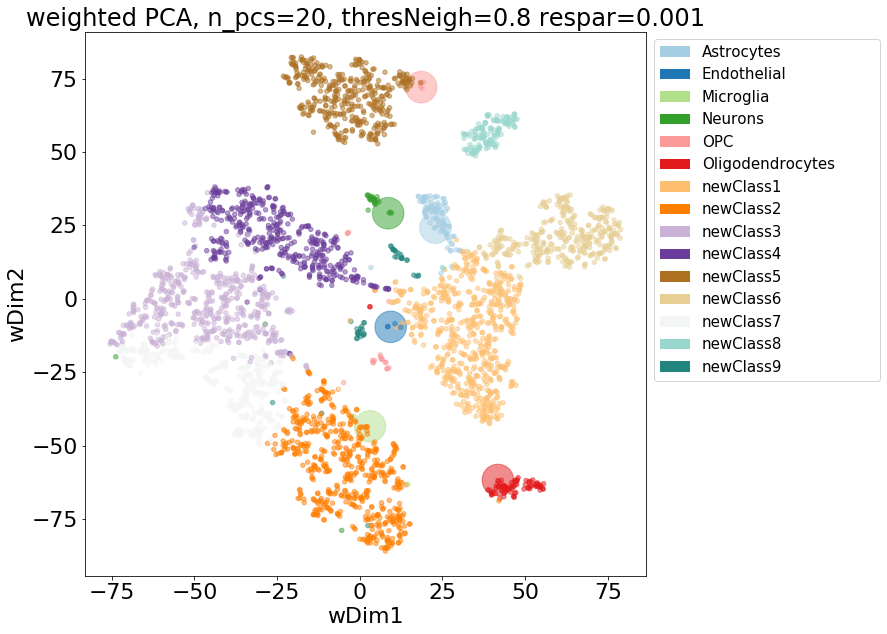

In [709]:
newlut = dict(zip(class_numbers,sns.color_palette('Paired', 10)+sns.color_palette('BrBG',len(class_numbers)-10)))
newcolor = tsnedf['class'].map(newlut)
n_pcs = kwds['n_pcs']
thresn = kwds['threshold_neigborhood']
respar = kwds['resolution_parameter']
f,ax = plt.subplots(figsize=(12,10))
tsnedf.plot.scatter('wDim1','wDim2',s=weights*20
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,vals,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('weighted PCA, n_pcs='+str(n_pcs)+', thresNeigh='+str(thresn)+' respar='+str(respar))
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig('../leidenalg/Datasets/Darmanis_Brain/semiAnnotate_nofetal_nose_______lfEdges_equalweight_tSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.png')

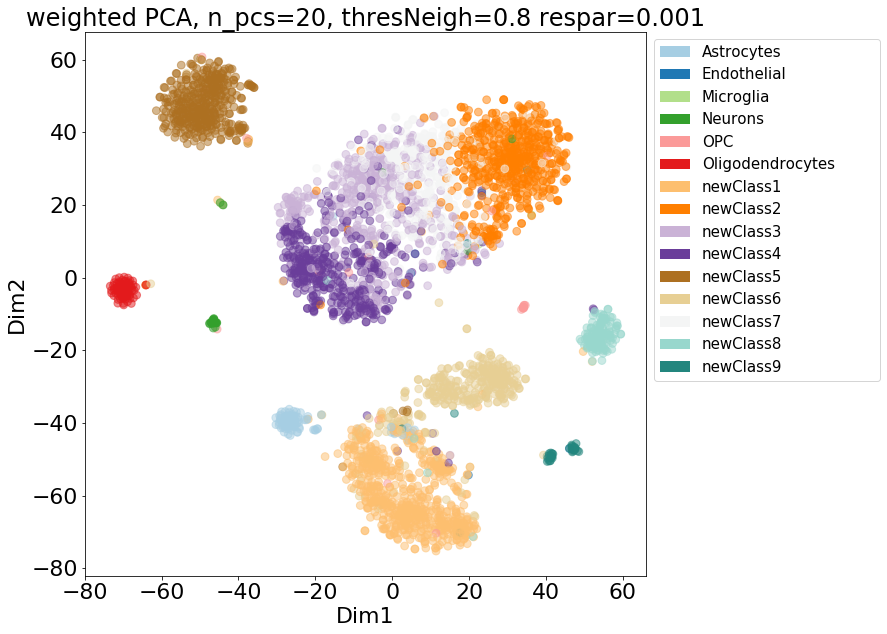

In [708]:
idx = tsnedf[6:].index
GBM_meta.loc[idx,'new_membership'] = tsnedf.iloc[6:]['new_membership']
# new results mapped onto old tSNE
newlut = dict(zip(vals,sns.color_palette('Paired', 10)+sns.color_palette('BrBG',len(vals)-10)))
newcolor = GBM_meta['new_membership'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
GBM_meta.plot.scatter('Dim1','Dim2',s=60
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('weighted PCA, n_pcs='+str(n_pcs)+', thresNeigh='+str(thresn)+' respar='+str(respar))
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig('../leidenalg/Datasets/Darmanis_Brain/semiAnnotate_nofetal_noselfEdges_equalweight_origtSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.png')

In [715]:
imp.reload(li)
imp.reload(semiannotate)
keys = ['cell type column','number of features cell type','number of features new data',
        'threshold_neigborhood','n_pcs','resolution_parameter','self_edging']
values = ['Cell_type',30,500,.8,20,.0012,True]
kwds = dict(zip(keys,values))
tsnedfSE, class_numbersSE,valsSE,wdmSE= li.semiAnnotate_to_pca_to_tsnedf(matrix.loc[GBM_list_genes],weights,BA_newmeta,GBM_meta,**kwds)

-------------------------------------------
perfoming weighted PCA
-------------------------------------------
perfoming tSNE
assigned default perplexity of 20
tSNE done.
-------------------------------------------
-------------------------------------------
perfoming UNweighted PCA
-------------------------------------------
perfoming tSNE
tSNE done.
-------------------------------------------


In [716]:
tsnedfSE['new_membership'].value_counts()
#tsnedfSE['original_membership'].value_counts()

newClass1           455
newClass2           443
newClass3           399
newClass4           392
newClass5           374
OPC                 325
newClass6           228
newClass7           215
newClass8           180
newClass9           124
newClass10          119
Astrocytes           94
Oligodendrocytes     84
newClass11           64
Endothelial          51
Neurons              27
newClass12           18
Microglia             3
Name: new_membership, dtype: int64

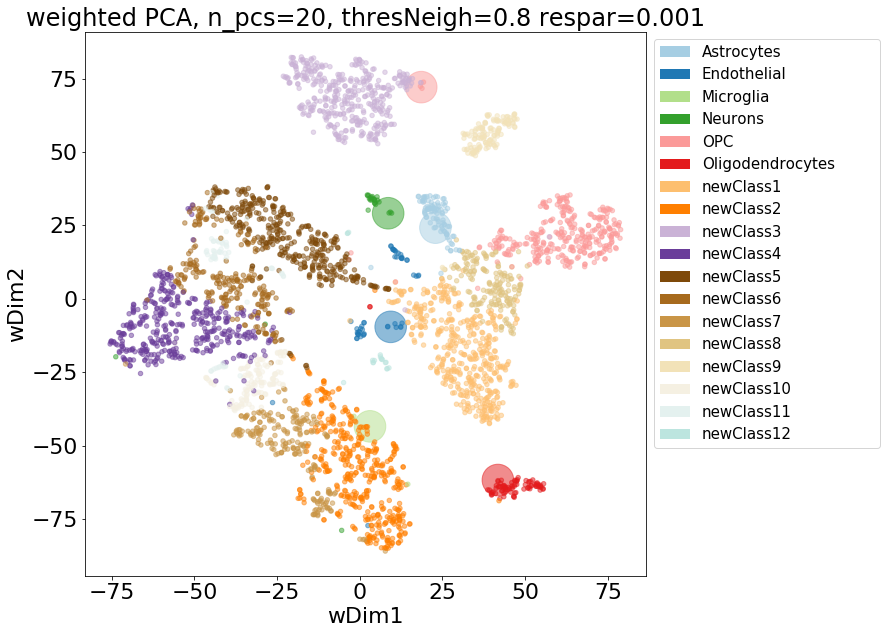

In [724]:
newlut = dict(zip(valsSE,sns.color_palette('Paired', 10)+sns.color_palette('BrBG',len(valsSE)-6)))
newcolor = tsnedfSE['new_membership'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
tsnedfSE.plot.scatter('wDim1','wDim2',s=weights*20
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,valsSE,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('weighted PCA, n_pcs='+str(n_pcs)+', thresNeigh='+str(thresn)+' respar='+str(respar))
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig('../leidenalg/Datasets/Darmanis_Brain/semiAnnotateSE_nofetal_spyrosselectedgenes_selfEdges_weightsEq_tSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.png')

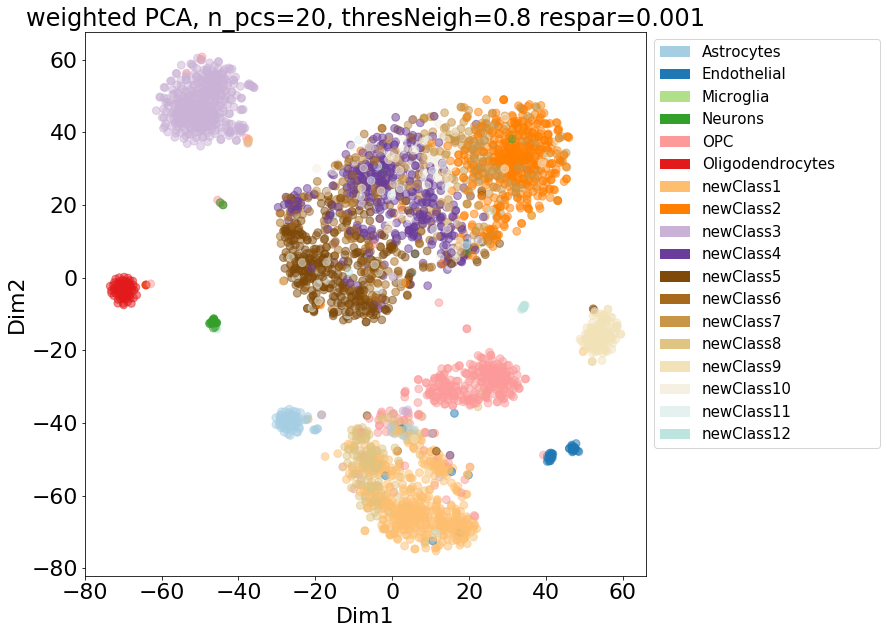

In [725]:
idx = tsnedf[6:].index
GBM_meta.loc[idx,'new_membershipSE'] = tsnedfSE.iloc[6:]['new_membership']
# new results mapped onto old tSNE
#newlut = dict(zip(valsSE,sns.color_palette('Paired', 10)+sns.color_palette('BrBG',len(valsSE)-6)))
newcolor = GBM_meta['new_membershipSE'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
GBM_meta.plot.scatter('Dim1','Dim2',s=60
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('weighted PCA, n_pcs='+str(n_pcs)+', thresNeigh='+str(thresn)+' respar='+str(respar))
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig('../leidenalg/Datasets/Darmanis_Brain/semiAnnotate_nofetal_spyrosselectedgenes_selfEdges_equalweight_origtSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.png')

In [719]:
newlut

{'Astrocytes': (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 'Endothelial': (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 'Microglia': (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 'Neurons': (0.2, 0.6274509803921569, 0.17254901960784313),
 'OPC': (0.984313725490196, 0.6039215686274509, 0.6),
 'Oligodendrocytes': (0.8901960784313725,
  0.10196078431372549,
  0.10980392156862745),
 'newClass1': (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 'newClass2': (1.0, 0.4980392156862745, 0.0),
 'newClass3': (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 'newClass4': (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 'newClass5': (0.49304113802383703, 0.28465974625144175, 0.03421760861207228),
 'newClass6': (0.6549019607843137, 0.4173010380622837, 0.1118800461361015),
 'newClass7': (0.7883890811226452, 0.5858515955401767, 0.27489427143406375),
 'newClass8': (0.8798154555940023, 0.7695501730103805, 0.

In [723]:
tsnedfSE.head()

,wDim1,wDim2,class,original_membership,new_membership,uDim1,uDim2
Astrocytes,22.886993,24.251070,0,NaN,Astrocytes,20.871822,-28.596323
Endothelial,9.349415,-9.516350,1,NaN,Endothelial,12.796626,-9.079830
Microglia,3.096344,-43.398720,2,NaN,Microglia,-0.576872,-72.931335
Neurons,8.591990,29.163052,3,NaN,Neurons,9.668939,30.668192
OPC,18.590269,72.100708,4,NaN,OPC,13.394923,46.024483


In [369]:
a=np.ndarray([2,3,4],np.int)

In [374]:
a[0][0]

array([4603862117898269748, 4600790112339299838, 4591562667843266449,
       4607182418800017408])

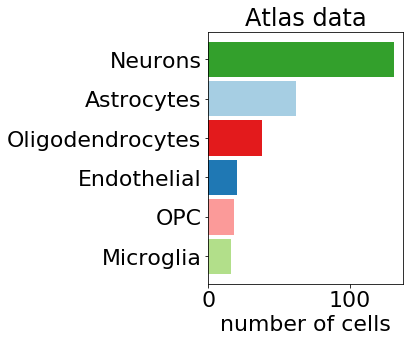

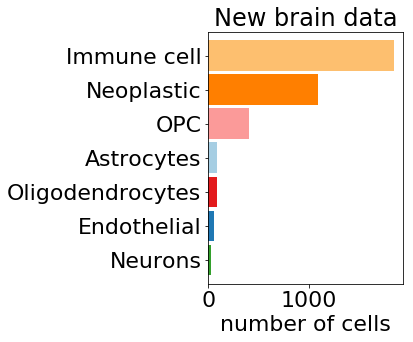

In [279]:
f,ax = plt.subplots(figsize=(6,5))
newlut = dict(zip(np.sort(BA_newmeta['Cell_type'].unique()),sns.color_palette('Paired',len(BA_newmeta['Cell_type'].unique()))))
colors = BA_newmeta['Cell_type'].value_counts().index.map(newlut)
BA_newmeta['Cell_type'].value_counts().plot.barh(width=.9,ax=ax,color=colors)
plt.gca().invert_yaxis()
plt.title('Atlas data')
plt.xlabel('number of cells')
plt.gcf().subplots_adjust(left=.5,right=0.95,bottom=.2,top=.9)
f.savefig('../leidenalg/Datasets/Darmanis_Brain/BrainAtlas_data_original_cellNumBarh.png')

f,ax = plt.subplots(figsize=(6,5))
colors = GBM_meta['Cell_type'].value_counts().index.map(lut)
GBM_meta['Cell_type'].value_counts().plot.barh(width=.9,color=colors,ax=ax)
plt.gca().invert_yaxis()
plt.xlabel('number of cells')
plt.title('New brain data')
plt.gcf().subplots_adjust(left=.5,right=0.95,bottom=.2,top=.9)
f.savefig('../leidenalg/Datasets/Darmanis_Brain/GBM_data_original_cellNumBarh.png')

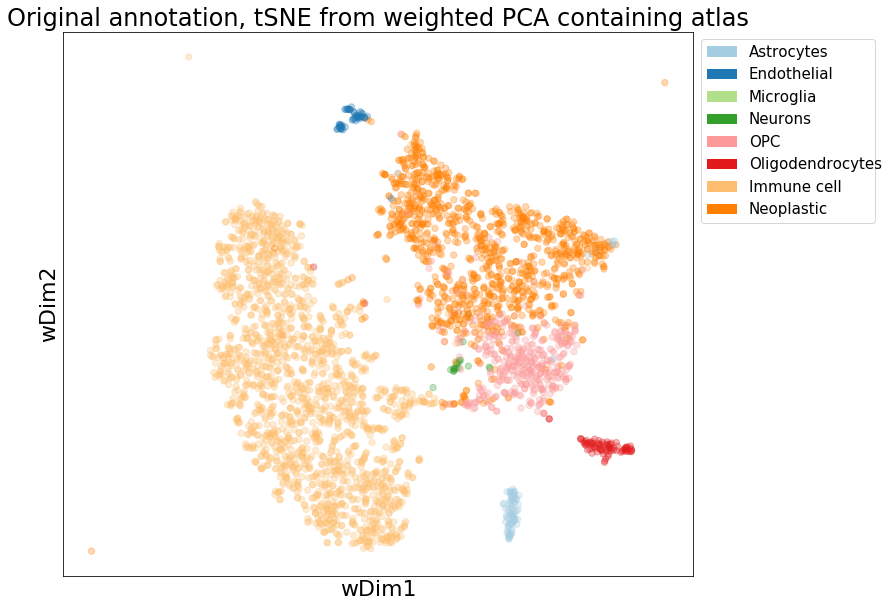

In [292]:
tsnedfSE
newlut
keys = list(tsnedfSE[:6].index)+list(set(tsnedfSE.iloc[6:]['original_membership']).difference(set(tsnedfSE[:6].index)))
values = sns.color_palette('Paired',len(keys))
lut = dict(zip(keys,values))
colors = tsnedfSE[6:].original_membership.map(lut)

f = plt.figure(figsize=(12,10))
gs = gridspec.GridSpec(1,1)
ax = f.add_subplot(gs[0,0])
tsnedfSE[6:].plot.scatter('wDim1','wDim2',ax=ax,color=colors,s=40,alpha=.3)#,label=colors.keys)
for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.yticks([]);plt.xticks([])
plt.title('Original annotation, tSNE from weighted PCA containing atlas')
plt.gcf().subplots_adjust(left=.05,right=0.78)
plt.show()
f.savefig('../leidenalg/Datasets/Darmanis_Brain/tSNE_weightedPCA_originalAnnotation'+date+'.png')

In [294]:
lut

{'Astrocytes': (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 'Endothelial': (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 'Microglia': (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 'Neurons': (0.2, 0.6274509803921569, 0.17254901960784313),
 'OPC': (0.984313725490196, 0.6039215686274509, 0.6),
 'Oligodendrocytes': (0.8901960784313725,
  0.10196078431372549,
  0.10980392156862745),
 'Immune cell': (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 'Neoplastic': (1.0, 0.4980392156862745, 0.0)}

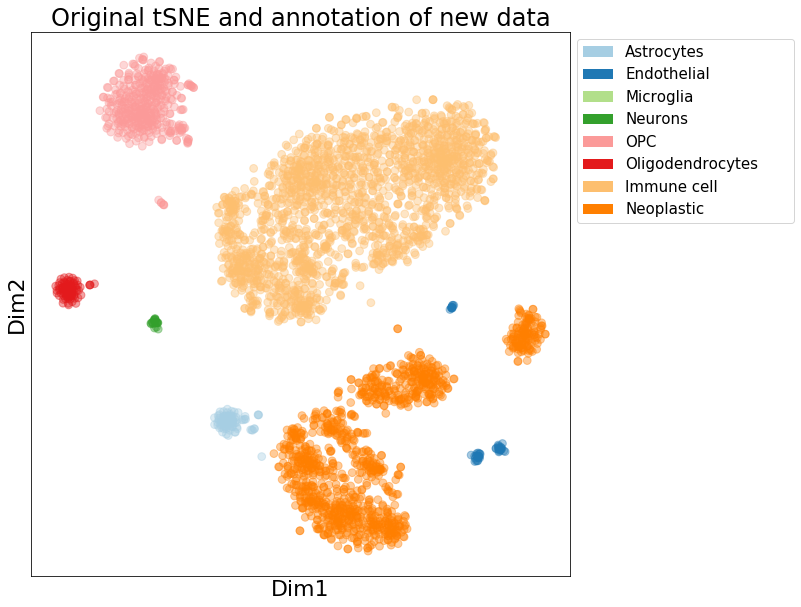

In [300]:
f,ax = plt.subplots(figsize=(11,10))
GBM_meta.plot.scatter('Dim1','Dim2',c=colors,ax=ax,alpha=.4,s=60)

for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.yticks([]);plt.xticks([])
plt.title('Original tSNE and annotation of new data')
plt.gcf().subplots_adjust(left=.05,right=0.73)
f.savefig('../leidenalg/Datasets/Darmanis_Brain/tSNE_original_oldAnnotation_'+date+'.png')

In [ ]:
"""
distance_matrix_num = pd.DataFrame(dm)
for cell in distance_matrix_num.index:
        valshort = list(distance_matrix_num.loc[cell].sort_values(ascending=True)[1:NNeighbors].values)
        valthresidx = [valshort.index(x) for x in valshort if x>.2]
        inxshort = list(distance_matrix_num.loc[cell].sort_values(ascending=False)[1:NNeighbors].index)
        idxthres = [inxshort[x] for x in valthresidx] # add only pairs with correlation >.2
        indices.append(idxthres)
        values.append(valshort)
        for i in range(len(idxthres)):
            pairs.append((cell,indices[cell][i]))"""

In [253]:
pairs_wSE_80 = li.make_pairs(pd.DataFrame(wdmSE),.2,5)

---------------------------------------
Making list of edges with 80.0% correlation and up
Max 5 edges per cell.
Found 14137 edges.
---------------------------------------


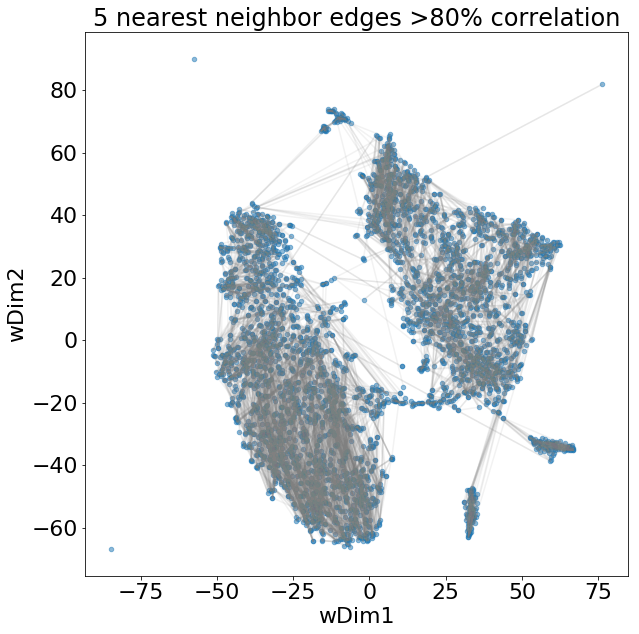

In [254]:
f,ax = plt.subplots()
for pair in pairs_wSE_80:
    xy1 = tsnedfSE.iloc[pair[0]][['wDim1','wDim2']]
    xy2 = tsnedfSE.iloc[pair[1]][['wDim1','wDim2']]
    ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.1
            ,c='gray')

tsnedf.plot.scatter('wDim1','wDim2',figsize=(10,10),ax=ax,alpha=.5)
#plt.yticks([]);plt.xticks([])
plt.title('5 nearest neighbor edges >80% correlation')
plt.gcf().subplots_adjust(right=0.88)
plt.show()
f.savefig('../leidenalg/Datasets/Darmanis_Brain/brain_edges_corr80p'+date+'.png')

---------------------------------------
Making list of edges with 95.0% correlation and up
Max 5 edges per cell.
Found 10012 edges.
---------------------------------------


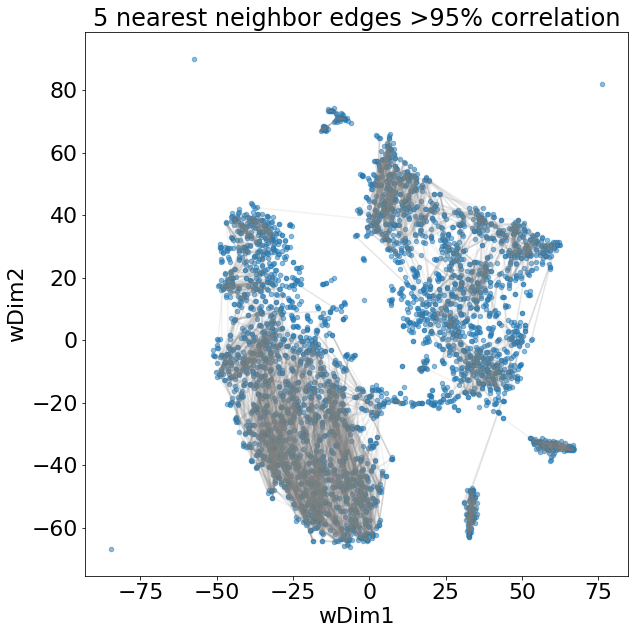

In [255]:
pairs_wSE_95 = li.make_pairs(pd.DataFrame(wdmSE),.05,5)
f,ax = plt.subplots()
for pair in pairs_wSE_95:
    xy1 = tsnedfSE.iloc[pair[0]][['wDim1','wDim2']]
    xy2 = tsnedfSE.iloc[pair[1]][['wDim1','wDim2']]
    ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.1
            ,c='gray')

tsnedf.plot.scatter('wDim1','wDim2',figsize=(10,10),ax=ax,alpha=.5)
#plt.yticks([]);plt.xticks([])
plt.title('5 nearest neighbor edges >95% correlation')
plt.gcf().subplots_adjust(right=0.88)
plt.show()
f.savefig('../leidenalg/Datasets/Darmanis_Brain/brain_edges_corr95p'+date+'.png')

In [256]:
# plot edge length vs correlation as scatter
# colored by inter or intra class edge 
wdmSEdf = pd.DataFrame(wdmSE)
pairs = li.make_pairs(wdmSEdf,2,5)
pairdf = pd.DataFrame(pairs)
for pair in pairdf.index:
    cell1 = pairdf.loc[pair,0]
    cell2 = pairdf.loc[pair,1]
    class1 = tsnedfSE.iloc[cell1]['new_membership']
    class2 = tsnedfSE.iloc[cell2]['new_membership']
    if class1==class2:
        pairdf.loc[pair,'edge_type'] = 'inter_class'
    else:
        pairdf.loc[pair,'edge_type'] = 'intra_class'
    pairdf.loc[pair,'correlation'] = 1 - wdmSEdf.loc[cell1,cell2]
    pairdf.loc[pair,'distance'] = wdmSEdf.loc[cell1,cell2]
    xy1 = tsnedf.iloc[cell1][['wDim1','wDim2']]
    xy2 = tsnedf.iloc[cell2][['wDim1','wDim2']]
    pairdf.loc[pair,'edge_length'] =  np.sqrt((xy2[0]-xy1[0])**2+(xy2[1]-xy1[1])**2)

---------------------------------------
Making list of edges with -100% correlation and up
Max 5 edges per cell.
Found 14380 edges.
---------------------------------------


In [60]:
pairdf.head()

,0,1,edge_type,correlation,distance,edge_length
0,0,3140,inter_class,0.990079,0.009921,1.318546
1,0,3113,inter_class,0.984644,0.015356,0.044231
2,0,3095,inter_class,0.976665,0.023335,1.266812
3,0,3513,inter_class,0.975294,0.024706,1.184356
4,1,1362,inter_class,0.965174,0.034826,1.259345


In [38]:
pairdf.edge_type.value_counts()

inter_class    13702
intra_class      686
Name: edge_type, dtype: int64

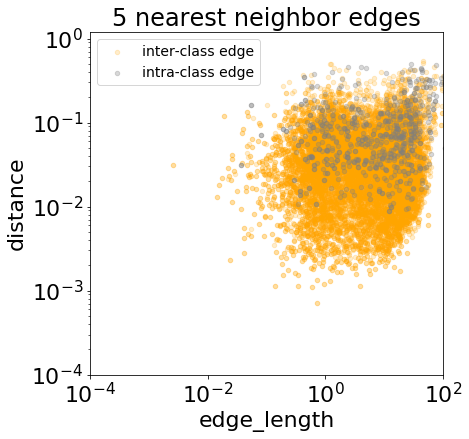

In [48]:
lut = {'inter_class':'orange','intra_class':'gray'}
cols = pairdf['edge_type'].map(lut)
f,ax = plt.subplots()
pairdf[pairdf['edge_type'].str.contains('inter')].plot.scatter('edge_length','distance',alpha=.2,figsize=(7,7),color='orange',label='inter-class edge',ax=ax)
pairdf[pairdf['edge_type'].str.contains('intra')].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color='gray',label='intra-class edge',ax=ax)
plt.yscale('log');plt.xscale('log')
plt.ylim(.0001,1.2)
plt.xlim(.0001,100)
plt.title('5 nearest neighbor edges')
plt.gcf().subplots_adjust(left=0.2,bottom=.2)
f.savefig('../leidenalg/Datasets/Darmanis_Brain/dist_edgelength.png')

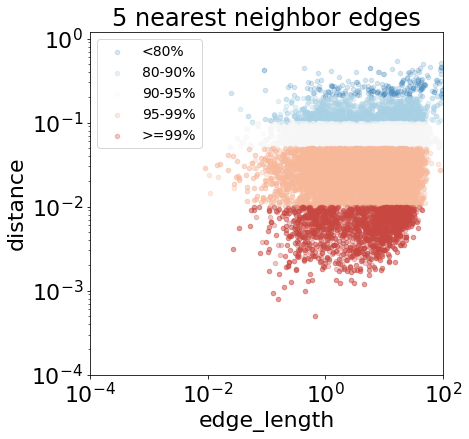

In [258]:
#lut = {'inter_class':'orange','intra_class':'gray'}
#cols = pairdf['edge_type'].map(lut)
colors = sns.color_palette('RdBu_r',5)
f,ax = plt.subplots()
pairdf[pairdf['correlation']<.8].plot.scatter('edge_length','distance',alpha=.2,figsize=(7,7),color=colors[0],label='<80%',ax=ax)
pairdf[(pairdf['correlation']<.9)&(pairdf['correlation']>=.8)].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color=colors[1],label='80-90%',ax=ax)
pairdf[(pairdf['correlation']<.95)&(pairdf['correlation']>=.9)].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color=colors[2],label='90-95%',ax=ax)
pairdf[(pairdf['correlation']<.99)&(pairdf['correlation']>=.95)].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color=colors[3],label='95-99%',ax=ax)
pairdf[pairdf['correlation']>=.99].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color=colors[4],label='>=99%',ax=ax)
plt.yscale('log');plt.xscale('log')
plt.ylim(.0001,1.2)
plt.xlim(.0001,100)
plt.title('5 nearest neighbor edges')
plt.gcf().subplots_adjust(left=0.2,bottom=.2)
f.savefig('../leidenalg/Datasets/Darmanis_Brain/dist_edgelength_corrcol.png')

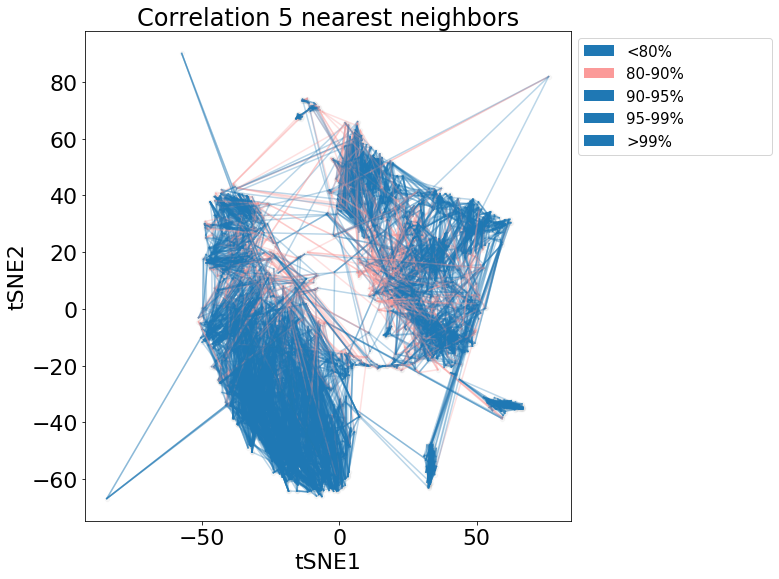

In [257]:
#pairs_wSE_95 = li.make_pairs(pd.DataFrame(wdmSE),.05,5)
f,ax = plt.subplots(figsize=(10,10))
tsnedf.plot.scatter('wDim1','wDim2',figsize=(10,10),ax=ax,alpha=.05,color='gray')
for pair in pairdf.index:
    xy1 = tsnedfSE.iloc[pairdf.loc[pair,0]][['wDim1','wDim2']]
    xy2 = tsnedfSE.iloc[pairdf.loc[pair,1]][['wDim1','wDim2']]
    corr = pairdf.loc[pair,'correlation']
    if corr<.8:
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[0])
    elif (corr>=.8) & (corr<.9):
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[1])
    elif (corr>=.9) & (corr<.95):
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[2])
    elif (corr>=.95) & (corr<.99):
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[3])
    elif corr>=.99:
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[4])
#
#plt.yticks([]);plt.xticks([])
handles = ['<80%','80-90%','90-95%','95-99%','>99%']
labs = [f for f in colors]
dictcorr = dict(zip(handles,labs))
for x,y in dictcorr.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handle, labels = ax.get_legend_handles_labels()
    

plt.xlabel('tSNE1'),plt.ylabel('tSNE2')
plt.title('Correlation 5 nearest neighbors')
plt.legend(handle,handles, bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.gcf().subplots_adjust(right=0.8,bottom=.2)
plt.show()
f.savefig('../leidenalg/Datasets/Darmanis_Brain/brain_edges_corr_tsne'+date+'.png')

In [94]:
# investigate classification using sankey diagram. first massage data into right format
#tsnedfSE


In [91]:
def rgb_to_hex(list_vals):
    hexval=[]
    for r in list_vals:
        r *=255
        hexval.append('#%02X%02X%02X' % (int(round(r[0]*255)),int(round(r[1]*255)),int(round(r[2]*255))))
    return hexval

from collections import defaultdict

def sankey_BB(dataframe,**kwds):
    """
    necessary keywords:
    left_column, right_column,figure_name,savedir,close_plot
    """
    left_col = kwds['left_column']
    right_col = kwds['right_column']
    figname = kwds['figure_name']
    closePlot = kwds['close_plot']
    savedir = kwds['savedir']
    
    left = dataframe[left_col]
    right = dataframe[right_col]

    leftWeight = None
    rightWeight = None
    leftLabels = None
    rightLabels = None
    rightColor = False
    aspect = 20
    fontsize=20
    #figname = 'spyros_brain_noFetal_sankey_bot'
    figureName = figname

    keys = [str(f) for f in set(list(dataframe[left_col].unique())+list(dataframe[right_col].unique()))]
    keys = list(set(list(dataframe[left_col].unique())+list(dataframe[right_col].unique())))
    values=sns.color_palette('husl',len(keys))
    values_hex = rgb_to_hex(values)
    
    colors = dict(zip(keys,values_hex))
    colors[-1]='gray'
    colorDict = colors

    if leftWeight is None:
        leftWeight = []
    if rightWeight is None:
        rightWeight = []
    if leftLabels is None:
        leftLabels = []
    if rightLabels is None:
        rightLabels = []
    # Check weights
    if len(leftWeight) == 0:
        leftWeight = np.ones(len(left))

    if len(rightWeight) == 0:
        rightWeight = leftWeight

    plt.figure()
    plt.rc('text', usetex=False)
    plt.rc('font', family='serif')

    # Create Dataframe
    if isinstance(left, pd.Series):
        left = left.reset_index(drop=True)
    if isinstance(right, pd.Series):
        right = right.reset_index(drop=True)
    dataFrame = pd.DataFrame({'left': left, 'right': right, 'leftWeight': leftWeight,
                              'rightWeight': rightWeight}, index=range(len(left)))

    if len(dataFrame[(dataFrame.left.isnull()) | (dataFrame.right.isnull())]):
        raise NullsInFrame('Sankey graph does not support null values.')

    # Identify all labels that appear 'left' or 'right'
    allLabels = pd.Series(np.r_[dataFrame.left.unique(), dataFrame.right.unique()]).unique()

    # Identify left labels
    if len(leftLabels) == 0:
        leftLabels = pd.Series(dataFrame.left.unique()).unique()
    else:
        check_data_matches_labels(leftLabels, dataFrame['left'], 'left')

    # Identify right labels
    if len(rightLabels) == 0:
        rightLabels = pd.Series(dataFrame.right.unique()).unique()
    else:
        check_data_matches_labels(leftLabels, dataFrame['right'], 'right')
    # If no colorDict given, make one
    if colorDict is None:
        colorDict = {}
        palette = "hls"
        colorPalette = sns.color_palette(palette, len(allLabels))
        for i, label in enumerate(allLabels):
            colorDict[label] = colorPalette[i]
    else:
        missing = [label for label in allLabels if label not in colorDict.keys()]
        if missing:
            msg = "The colorDict parameter is missing values for the following labels : "
            msg += '{}'.format(', '.join(missing))
            raise ValueError(msg)

    # Determine widths of individual strips
    ns_l = defaultdict()
    ns_r = defaultdict()
    for leftLabel in leftLabels:
        leftDict = {}
        rightDict = {}
        for rightLabel in rightLabels:
            leftDict[rightLabel] = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].leftWeight.sum()
            rightDict[rightLabel] = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].rightWeight.sum()
        ns_l[leftLabel] = leftDict
        ns_r[leftLabel] = rightDict

    # Determine positions of left label patches and total widths
    leftWidths = defaultdict()
    leftLabels[::-1].sort()
    rightLabels[::-1].sort()
    rightLabels = rightLabels[[-1]+list(range(len(rightLabels)-1))]
    for i, leftLabel in enumerate(leftLabels):
        #print(leftLabel)
        myD = {}
        myD['left'] = dataFrame[dataFrame.left == leftLabel].leftWeight.sum()
        if i == 0:
            myD['bottom'] = 0
            myD['top'] = myD['left']
        else:
            myD['bottom'] = leftWidths[leftLabels[i - 1]]['top'] + 0.02 * dataFrame.leftWeight.sum()
            myD['top'] = myD['bottom'] + myD['left']
            topEdge = myD['top']
        leftWidths[leftLabel] = myD

    # Determine positions of right label patches and total widths
    rightWidths = defaultdict()
    for i, rightLabel in enumerate(rightLabels):
        myD = {}
        myD['right'] = dataFrame[dataFrame.right == rightLabel].rightWeight.sum()
        if i == 0:
            myD['bottom'] = 0
            myD['top'] = myD['right']
        else:
            myD['bottom'] = rightWidths[rightLabels[i - 1]]['top'] + 0.02 * dataFrame.rightWeight.sum()
            myD['top'] = myD['bottom'] + myD['right']
            topEdge = myD['top']
        rightWidths[rightLabel] = myD

    # Total vertical extent of diagram
    xMax = topEdge / aspect

    # Draw vertical bars on left and right of each  label's section & print label
    for leftLabel in leftLabels:
        plt.fill_between(
            [-0.02 * xMax, 0],
            2 * [leftWidths[leftLabel]['bottom']],
            2 * [leftWidths[leftLabel]['bottom'] + leftWidths[leftLabel]['left']],
            color=colorDict[leftLabel],
            alpha=0.99
        )
        plt.text(
            -0.05 * xMax,
            leftWidths[leftLabel]['bottom'] + 0.5 * leftWidths[leftLabel]['left'],
            leftLabel,
            {'ha': 'right', 'va': 'center'},
            fontsize=fontsize
        )
    for rightLabel in rightLabels:
        plt.fill_between(
            [xMax, 1.02 * xMax], 2 * [rightWidths[rightLabel]['bottom']],
            2 * [rightWidths[rightLabel]['bottom'] + rightWidths[rightLabel]['right']],
            color=colorDict[rightLabel],
            alpha=0.99
        )
        plt.text(
            1.05 * xMax,
            rightWidths[rightLabel]['bottom'] + 0.5 * rightWidths[rightLabel]['right'],
            rightLabel,
            {'ha': 'left', 'va': 'center'},
            fontsize=fontsize
        )

    # Plot strips
    for leftLabel in leftLabels:
        for rightLabel in rightLabels:
            labelColor = leftLabel
            if rightColor:
                labelColor = rightLabel
            if len(dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)]) > 0:
                # Create array of y values for each strip, half at left value,
                # half at right, convolve
                ys_d = np.array(50 * [leftWidths[leftLabel]['bottom']] + 50 * [rightWidths[rightLabel]['bottom']])
                ys_d = np.convolve(ys_d, 0.05 * np.ones(20), mode='valid')
                ys_d = np.convolve(ys_d, 0.05 * np.ones(20), mode='valid')
                ys_u = np.array(50 * [leftWidths[leftLabel]['bottom'] + ns_l[leftLabel][rightLabel]] + 50 * [rightWidths[rightLabel]['bottom'] + ns_r[leftLabel][rightLabel]])
                ys_u = np.convolve(ys_u, 0.05 * np.ones(20), mode='valid')
                ys_u = np.convolve(ys_u, 0.05 * np.ones(20), mode='valid')

                # Update bottom edges at each label so next strip starts at the right place
                leftWidths[leftLabel]['bottom'] += ns_l[leftLabel][rightLabel]
                rightWidths[rightLabel]['bottom'] += ns_r[leftLabel][rightLabel]
                plt.fill_between(
                    np.linspace(0, xMax, len(ys_d)), ys_d, ys_u, alpha=0.65,
                    color=colorDict[labelColor]
                )
    plt.gca().axis('off')
    plt.gcf().set_size_inches(6, 18)
    if figureName != None:
        plt.savefig(savedir+"{}.png".format(figureName), bbox_inches='tight', dpi=150)
        plt.savefig(savedir+"{}.pdf".format(figureName), bbox_inches='tight', dpi=150)
    if closePlot:
        plt.close()

In [90]:
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','spyros_classification_noFetal_selfEgdes'+date
        ,'../leidenalg/Datasets/Darmanis_Brain/',True]
kw = dict(zip(keys,valu))
sankey_BB(tsnedfSE[8:],**kw)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701), (0.9707505829046977, 0.4626541987597626, 0.26486329418330007), (0.8369430560927636, 0.5495828952802333, 0.1952683223448124), (0.7350228985632719, 0.5952719904750953, 0.1944419133847522), (0.6430915736746491, 0.6271955086583126, 0.19381135329796756), (0.5310702086647983, 0.6569113639885688, 0.1931838276161326), (0.3126890019504329, 0.6928754610296064, 0.1923704830330379), (0.1998437102815942, 0.6927711055021983, 0.4485948481767363), (0.20582072623426667, 0.6842209016721069, 0.5675558225732941), (0.21044753832183283, 0.6773105080456748, 0.6433941168468681), (0.2151139535594307, 0.6700707833028816, 0.7112365203426209), (0.22126158707091403, 0.6600977737826563, 0.7915486637100363), (0.23299120924703914, 0.639586552066035, 0.9260706093977744), (0.5392573577708815, 0.5821140171749066, 0.9584212824085171), (0.731751635642941, 0.5128186367840487, 0.9581005178234921), (0.9082572436765556, 0.40195790729656516, 0.9576909250290225), (

In [122]:
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','spyros_classification_noFetal_NoSelfEgdes'+date
        ,'../leidenalg/Datasets/Darmanis_Brain/',True]
kw = dict(zip(keys,valu))
#sankey_BB(tsnedf[8:],**kw)

In [117]:
matrix_feature_selected
tsnedf.groupby('new_membership').count()

#tsnedf

,wDim1,wDim2,class,original_membership,uDim1,uDim2
new_membership,,,,,,
Astrocytes,100,100,100,99,100,100
Endothelial,60,60,60,59,60,60
Microglia,2,2,2,1,2,2
Neurons,22,22,22,21,22,22
OPC,1,1,1,0,1,1
Oligodendrocytes,1,1,1,0,1,1
hybrid,3,3,3,2,3,3
hybrids,2,2,2,1,2,2
newClass1,1278,1278,1278,1278,1278,1278


In [209]:
from scipy.spatial.distance import pdist, squareform
from fastcluster import linkage
from polo import optimal_leaf_ordering

def _optimal_order(data, **kwargs):
    """ Optimal leaf ordering
        **kwargs passed to pdist e.g. metric='correlation'
    """
    d = pdist(data, **kwargs)
    link = linkage(d, method='average')
    optimal_order = optimal_leaf_ordering(link, d)
    return optimal_order

def make_top_genes(feat_sel_matrix,tsne_df,column_name,numgenes):
    cols = tsne_df[column_name].unique()
    genes = pd.DataFrame(index=range(numgenes),columns=cols)
    gexp = genes.copy()
    for group in cols:
        members = tsne_df[tsne_df[column_name]==group].index
        genes[group] = feat_sel_matrix[members].mean(axis=1).sort_values(ascending=False)[:numgenes].index
        #gexp[group] = matrix_feature_selected[members].mean(axis=1).sort_values(ascending=False)[:20].values
    unique_genes = set()
    for c in genes.columns:
        unique_genes |= set(genes[c])
    panel = pd.DataFrame(index=unique_genes,columns=cols)
    for group in cols:
        members = tsne_df[tsne_df[column_name]==group].index
        panel[group] = feat_sel_matrix.loc[panel.index,members].mean(axis=1)
    return panel

def ordered_classes(panel):
    row_link = _optimal_order(panel.T.corr(), metric='correlation')
    col_link = _optimal_order(panel.corr(), metric='correlation')
    #cg = sns.clustermap(panel.T.corr(), row_linkage=row_link, col_linkage=row_link,figsize=(20,55),xticklabels=False)
    cg = sns.clustermap(np.log2(panel+0.001),row_linkage=row_link,col_linkage=col_link)
    plt.close()
    rows = cg.dendrogram_row.reordered_ind
    columns = cg.dendrogram_col.reordered_ind
    
    row_names = list(panel.iloc[rows].index)
    col_names = list(panel.T.iloc[columns].index)
    return row_names, col_names

def order_correlation_matrix(matrix):
    row_link = _optimal_order(matrix, metric='correlation')
    cg = sns.clustermap(matrix,row_linkage=row_link,col_linkage=col_link)
    plt.close()
    rows = cg.dendrogram_row.reordered_ind
    row_names = list(matrix.iloc[rows].index)
    return row_names

def plot_dot(panel,rows,columns,**kwds):
    figname = kwds['figure_name']
    savedir = kwds['savedir']
    xgrid = list(range(len(panel.columns)))
    ygrid = list(range(40))
    import get_timestamp as time
    date = time.ymd()
    f = plt.figure(figsize=(20,50))
    i=0
    for gene in panel.loc[rows].index:
        temp = panel[panel.index==gene].loc[:,columns]
        #temp = sizes[sizes.index==gene].iloc[:,columnz].multiply(10)
        plt.scatter(xgrid,np.ones(len(xgrid))*i,s=temp.divide(10),alpha=.5)
        i+=1
    plt.yticks(np.arange(len(panel)),rows)
    plt.xticks(np.arange(len(panel.T)),columns,rotation=90)
    f.savefig(savedir+'dotplot_'+figname+date+'.png')
    plt.close()
    
def make_dotplot(feat_sel_matrix,tsne_df,numgenes,**kwargs):
    column_name = kwargs['right_column']
    gene_panel = make_top_genes(feat_sel_matrix,tsne_df,column_name,numgenes)
    r,c = ordered_classes(gene_panel)
    plot_dot(gene_panel,r,c,**kwargs)
    return gene_panel,r,c
    

In [153]:
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','spyros_classification_noFetal_NoSelfEgdes_top5_'
        ,'../leidenalg/Datasets/Darmanis_Brain/',True]
kw = dict(zip(keys,valu))
genePanel5,ro5,co5 = make_dotplot(matrix_feature_selected,tsnedf,5,**kw)

In [139]:
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','spyros_classification_noFetal_NoSelfEgdes_newcells_'
        ,'../leidenalg/Datasets/Darmanis_Brain/',True]
kw = dict(zip(keys,valu))
genePanelNC,roNC,coNC = make_dotplot(matrix_feature_selected.iloc[:,8:],tsnedf[8:],20,**kw)
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','spyros_classification_noFetal_NoSelfEgdes_atlascells_'
        ,'../leidenalg/Datasets/Darmanis_Brain/',True]
kw = dict(zip(keys,valu))
genePanelOC,roOC,coOC = make_dotplot(matrix_feature_selected.iloc[:,:8],tsnedf[:8],20,**kw)

In [132]:
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','spyros_classification_noFetal_SelfEgdes'
        ,'../leidenalg/Datasets/Darmanis_Brain/',True]
kw = dict(zip(keys,valu))
genePanelSE,roSE,coSE = make_dotplot(matrix_feature_selected,tsnedfSE,20,**kw)

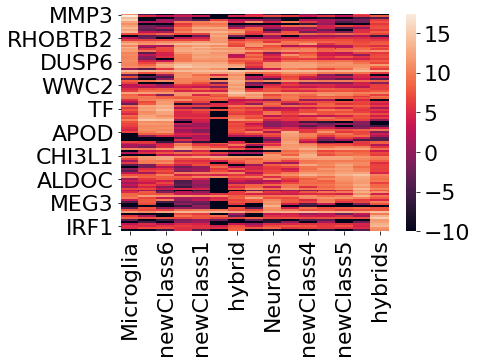

In [82]:
rows = cg.dendrogram_row.reordered_ind
columnz = cg.dendrogram_col.reordered_ind
sns.heatmap(np.log2(panel+0.001).iloc[rows,columnz])

In [149]:
xgrid

[0, 1, 2, 3, 4, 5, 6, 7]

/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys
/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  del sys.path[0]


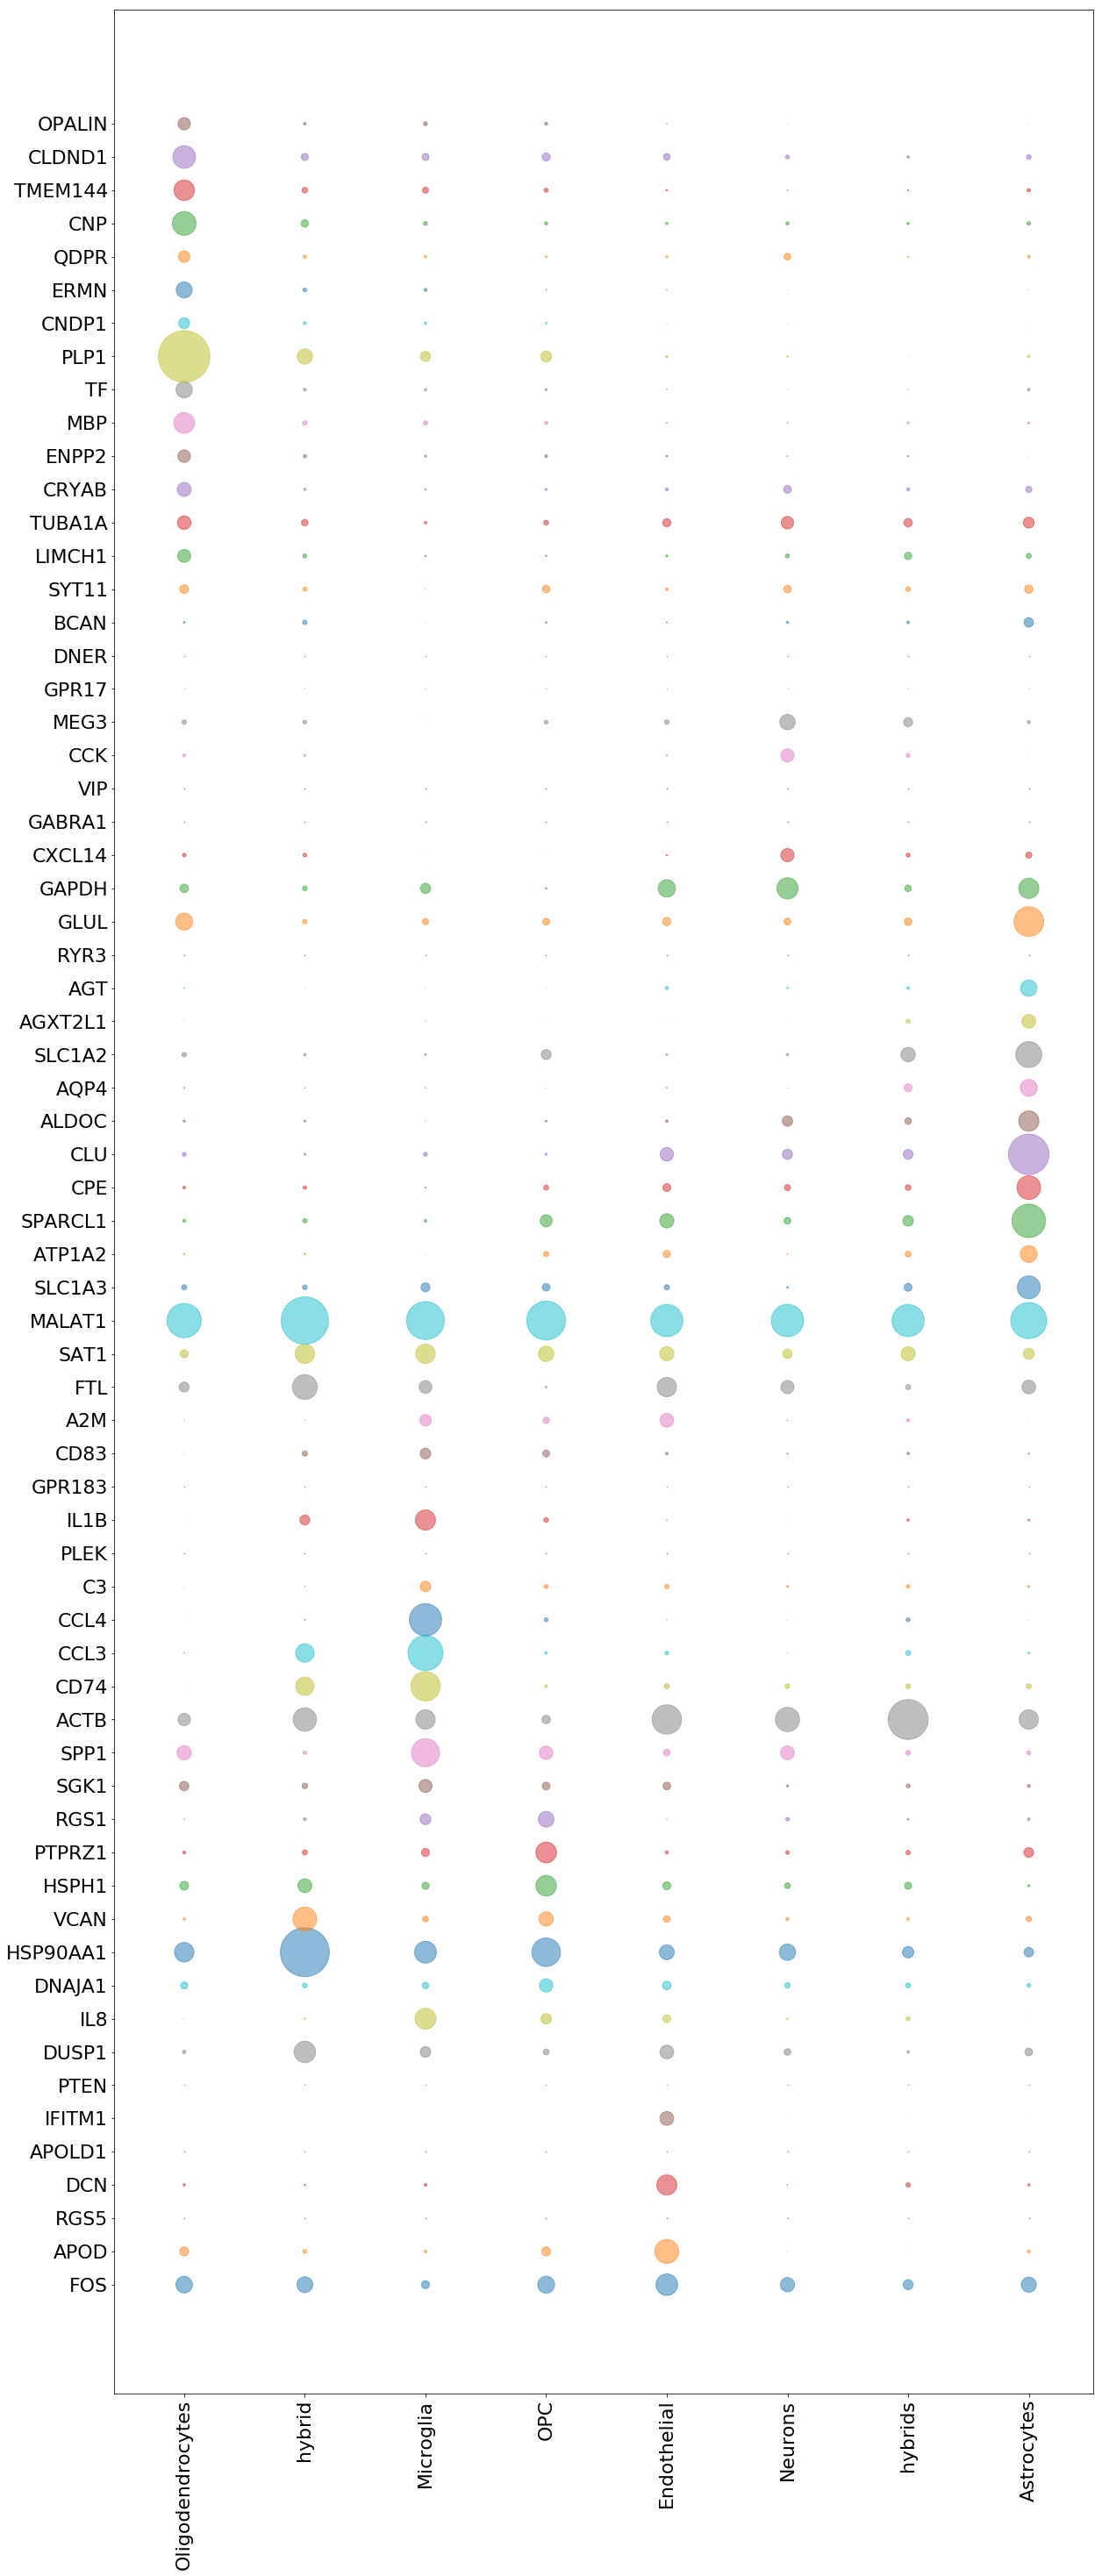

In [150]:

xgrid = list(range(len(coOC)))
ygrid = list(range(len(roOC)))

f = plt.figure(figsize=(20,50))
i=0
for gene in panel.loc[roOC].index:
    temp = panel[panel.index==gene].loc[:,coOC]
    #temp = sizes[sizes.index==gene].iloc[:,columnz].multiply(10)
    plt.scatter(xgrid,np.ones(len(xgrid))*i,s=temp.divide(10),alpha=.5)
    i+=1

plt.yticks(np.arange(len(ygrid)),panel.loc[roOC].index)
plt.xticks(np.arange(len(xgrid)),panel.T.loc[coOC].index,rotation=90
          )
plt.show()
f.savefig('../leidenalg/Datasets/Darmanis_Brain/dotplot_semiAnnotate_atlasCells_noSelfedges'+date+'.png')

In [116]:
#perform hierarchical clustering on heatmap 
tsnedf
matrix_feature_selected[matrix_feature_selected.index=='CIT']#.T.sort_values('CIT')

,Astrocytes,Endothelial,Microglia,Neurons,OPC,Oligodendrocytes,hybrid,hybrids,1001000173.G8,1001000173.D4,...,1001000271.C2,1001000271.D1,1001000271.B1,1001000271.A3,1001000271.E1,1001000271.F1,1001000271.D4,1001000271.C1,1001000271.H7,1001000271.H2
CIT,12.069619,36.300635,16.513174,385.904437,52.973862,40.073169,83.666911,500.980004,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
matrix_feature_selected['1001000238.E7'].sort_values()
matrix_feature_selected.max().max()

437879.44132966193

In [155]:
BA_meta.Cell_type.value_counts()

Neurons             131
Astrocytes           62
Oligodendrocytes     38
hybrid               24
hybrids              22
Endothelial          20
OPC                  18
Microglia            16
Name: Cell_type, dtype: int64

In [180]:
pd.pivot_table(index=tsnedf.index,columns=tsnedf['new_membership'].unique(),values=tsnedf['new_membership'])

TypeError: pivot_table() missing 1 required positional argument: 'data'

In [223]:
import collections
newdf = tsnedf[8:].copy()
newdf['class'] = newdf['class']+.1
cardf = pd.pivot_table(newdf,values='class',index=newdf.index,columns='new_membership',aggfunc=np.count_nonzero).fillna(0).T.corr()
#ordered_idx = order_correlation_matrix(cardf)


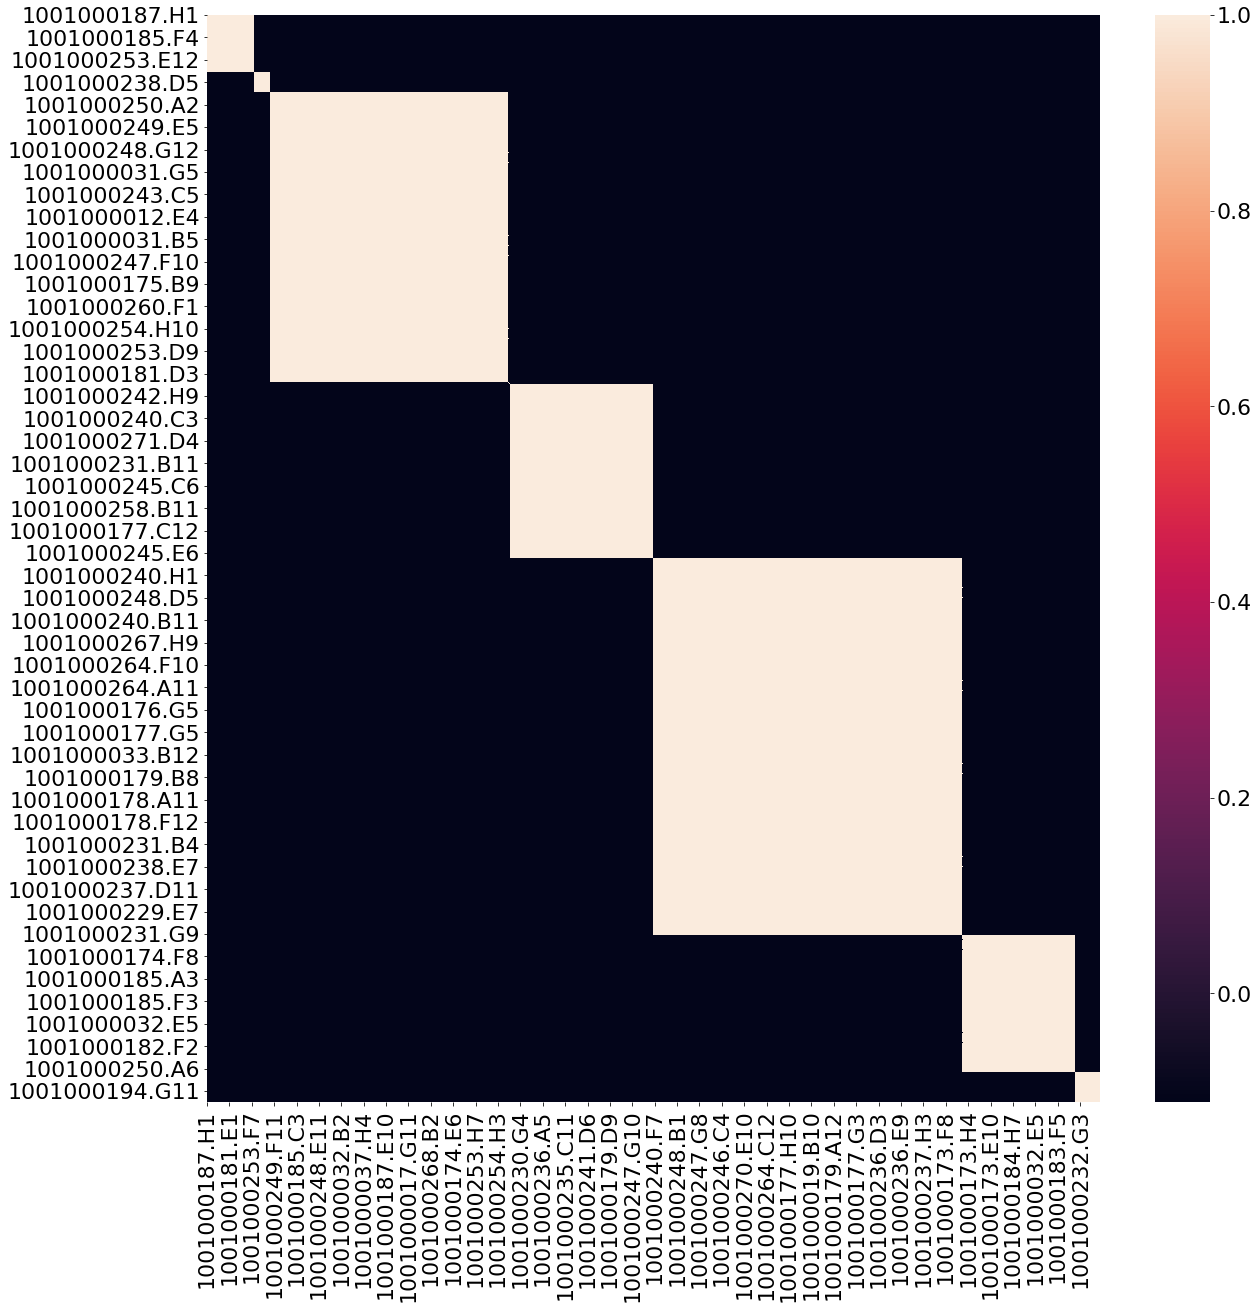

In [225]:
ordered_idx = newdf['new_membership'].sort_values().index
f=  plt.figure(figsize=(20,20))
sns.heatmap(cardf.loc[ordered_idx,ordered_idx])

In [226]:
newdf['new_membership'].value_counts()
#tsnedf['class'].value_counts()


newClass1           1243
Neurons              959
hybrid               575
newClass2            453
Astrocytes           190
newClass3             97
Endothelial           65
OPC                    4
hybrids                2
Oligodendrocytes       1
Name: new_membership, dtype: int64

In [221]:
tsnedf[tsnedf['new_membership'].str.contains('ligoden')]
tsnedf[tsnedf['new_membership'].str.contains('OPC')]

,wDim1,wDim2,class,original_membership,new_membership,uDim1,uDim2
OPC,-12.430294,25.147661,4.3,NaN,OPC,44.990341,25.802475
1001000175.H9,-14.078488,23.811340,4.3,Neuron,OPC,20.816017,42.374783
1001000175.G10,-14.071210,23.804029,4.3,Neoplastic,OPC,-9.731712,51.762283
1001000179.B12,-10.305135,17.561520,4.3,Neoplastic,OPC,-1.758823,50.203178
1001000259.G4,-14.488623,23.684746,4.3,Immune cell,OPC,-4.238031,50.717274


In [222]:
tsnedf['original_membership'].value_counts()

Immune cell        1847
Neoplastic         1091
OPC                 406
Astocyte             88
Oligodendrocyte      85
Vascular             51
Neuron               21
Name: original_membership, dtype: int64

In [501]:
newdf2 = None
newdf2 = tsnedfSE.copy()
newdf2['class2'] = newdf['class']+1
df = pd.pivot_table(newdf2,values='class2',index=newdf2.index,columns='original_membership',aggfunc=np.count_nonzero).fillna(0).copy()                     

In [510]:
df#.T.corr()
a = df.T.corr().values

In [483]:
df.T.sum().var()

0.0

In [647]:
a

array([[ 1.        ,  1.        ,  1.        , ..., -0.07142857,
        -0.07142857, -0.07142857],
       [ 1.        ,  1.        ,  1.        , ..., -0.07142857,
        -0.07142857, -0.07142857],
       [ 1.        ,  1.        ,  1.        , ..., -0.07142857,
        -0.07142857, -0.07142857],
       ...,
       [-0.07142857, -0.07142857, -0.07142857, ...,  1.        ,
        -0.07142857, -0.07142857],
       [-0.07142857, -0.07142857, -0.07142857, ..., -0.07142857,
         1.        , -0.07142857],
       [-0.07142857, -0.07142857, -0.07142857, ..., -0.07142857,
        -0.07142857,  1.        ]])

In [646]:
imp.reload(li)
keys = ['cell type column','number of features cell type','number of features new data',
        'threshold_neigborhood','n_pcs','resolution_parameter','self_edging']

respar = [.0012,.0011,.001,.00095,.0009]
trials = 5
b = np.ndarray([trials,3595,3595],np.int32)

for i in range(trials):
    values = ['Cell_type',30,500,.8,20,respar[i],True]
    kwds = dict(zip(keys,values))
    #ts, class_numSE,valSE,wdmSE= li.semiAnnotate_to_pca_to_tsnedf(matrix_feature_selected,weights,BA_newmeta,GBM_meta,**kwds)
    ts, class_numSE,valSE = li.semiAnnotate_using_tsnedf(matrix_feature_selected,weights,BA_newmeta,GBM_meta,tsnedfSE,**kwds)
    newdf2 = ts.copy()
    newdf2['class2'] = newdf['class']+1
    df = pd.pivot_table(newdf2,values='class2',index=newdf2.index,columns='new_membership',aggfunc=np.count_nonzero).fillna(0).copy()                     
    a = df.T.corr().values
    c[i][:][:] = a


TypeError: 'str' object does not support item assignment

In [652]:
#ts

In [635]:
average_df = pd.DataFrame(np.average(b,axis=0),index=df.index,columns=df.index)
average_df = pd.DataFrame(np.average(c,axis=0),index=df.index,columns=df.index)
#sns.heatmap(average_df)


In [641]:
drop_idx = average_df[(average_df[average_df==1].sum()==1)].index
stable_pairs = average_df.drop(drop_idx).drop(drop_idx,axis=1)
stablep = stable_pairs[stable_pairs==1].fillna(0)
groups = stablep.sum().value_counts().index
idxs = []
for cluster in groups:
    idxs.append(list(stablep[stablep.sum()==cluster].index))
clusterdict = dict(zip(groups,idxs))

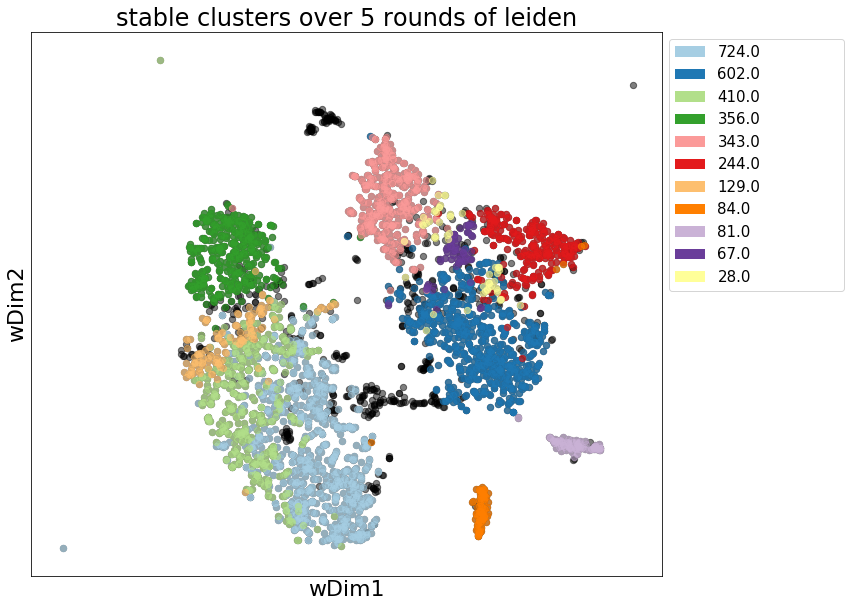

In [645]:
len(groups)
groupi = groups[:11]



values = sns.color_palette('Paired',len(groupi))
lut = dict(zip(groupi,values))

f,ax = plt.subplots(figsize=(12,10))

tsnedfSE.plot.scatter('wDim1','wDim2',ax=ax,color='k',s=2*20,alpha=.5)
for group in groupi:
    idxes = clusterdict[group]
    tsnedfSE.loc[idxes].plot.scatter('wDim1','wDim2',ax=ax,color=lut[group],s=40,alpha=.6)

for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.yticks([]);plt.xticks([])
plt.title('stable clusters over 5 rounds of leiden')
plt.gcf().subplots_adjust(left=.05,right=0.78)
plt.show()
#f.savefig('../leidenalg/Datasets/Darmanis_Brain/tSNE_weightedPCA_originalAnnotation'+date+'.png')

In [640]:
stablep.sum()#.value_counts()

1001000010.B4     724.0
1001000010.B5     724.0
1001000010.C1      42.0
1001000010.C5      42.0
1001000010.C8     356.0
1001000010.D5      42.0
1001000010.D9      81.0
1001000010.E8     356.0
1001000010.F1     356.0
1001000010.F10    356.0
1001000010.F7      41.0
1001000010.F8     356.0
1001000010.G2     724.0
1001000010.G3      20.0
1001000010.H3     356.0
1001000012.A1     602.0
1001000012.A10    244.0
1001000012.A11    244.0
1001000012.A12    602.0
1001000012.A2      67.0
1001000012.A3      10.0
1001000012.A4     602.0
1001000012.A5     602.0
1001000012.A6     602.0
1001000012.A7      28.0
1001000012.A8     602.0
1001000012.A9     602.0
1001000012.B1      28.0
1001000012.B10     67.0
1001000012.B11    602.0
                  ...  
1001000270.B4     724.0
1001000270.C1     724.0
1001000270.D1     724.0
1001000270.D12    410.0
1001000270.D7     129.0
1001000270.D9      19.0
1001000270.E10    724.0
1001000270.E12    724.0
1001000270.F10    724.0
1001000270.G1     724.0
1001000270.G3   

In [604]:
idxs

['1001000178.D9',
 '1001000230.G11',
 '1001000235.G10',
 '1001000238.H7',
 '1001000240.E7',
 '1001000241.A10',
 '1001000241.C9',
 '1001000267.H9']

In [572]:
average_df[average_df[average_df==1].sum().sort_values()==1]

/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,1001000010.B4,1001000010.B5,1001000010.C1,1001000010.C5,1001000010.C8,1001000010.D5,1001000010.D9,1001000010.E8,1001000010.F1,1001000010.F10,...,1001000271.E1,1001000271.F1,1001000271.H2,1001000271.H7,Astrocytes,Endothelial,Microglia,Neurons,OPC,Oligodendrocytes
1001000031.C8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.6,0.0,0.0
1001000031.E4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0
1001000031.G7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0
1001000037.A1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0
1001000037.D1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0
1001000037.G10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0
1001000173.B2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001000173.G6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001000174.C6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.6,0.0,0.0
1001000174.E12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0
